In [3]:
first_term = "vreemde"

In [1]:
import re, os, glob, pandas as pd
import editdistance
import sys
import dask.dataframe as dd

In [2]:
## Import token totals
os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//SCC//output-data")
token_totals = pd.read_csv('tokens_year.csv')

## Import Master DF
os.chdir("C://Users//Ruben//Documents//Scriptie//Data//bigrams//output")
df = dd.read_csv('total-bigrams.csv', dtype='str')

##
os.chdir("C://Users//Ruben//Documents//Scriptie//Data//unigrams//output//years")
df_unigrams = pd.read_csv('total-unigrams.csv')

## Define ED function
def GetCloseED(master_df, search_term, len_restr):
    output_list = list()
    
    subset_df = master_df[master_df.ngram.str[0] == search_term[0]]
    
    for word in list(subset_df.ngram):
        ed = editdistance.eval(search_term, word)
        if ed < 3:
            output_list.append(word)
    if len_restr == "yes":
        output_list = [e for e in output_list if len(e) == len(search_term)]
    return output_list

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
lalt = ['vaderlandfche', 'vaderlandsche', 'vaderlandsch', 'vaderlandschen',  'vaderlandfch', 'vaderlandfchen', 'vaderlandseh', 'vaderlandsehe', 'vaderlandsehen']

In [3]:
# Extraction based on known position of search word

subset = df[df['ngram'].str.split().str[1].isin(['buitenlandsch', 'buitenlandsche', 'buitenlandfche', 'buitenlandsehe', 'buitenlandfch', 'buitenlandseh', 'buitenlandschen'])].compute()


#subset['ngram'] = subset.ngram.str.split().str[1]


subset = subset.reset_index(drop=True)
subset['count'] = subset['count'].astype(float)
subset = subset.groupby(['ngram','year']).agg('sum')
subset = subset.stack().reset_index().drop('level_2', axis = 1)
subset.columns = ['ngram', 'year', 'count']
subset = subset.dropna()
subset = subset.pivot(index='ngram', columns='year', values='count')
subset = subset.fillna(0)
subset.columns = subset.columns.astype(str)
list_sums = dict()

for i in list(subset.columns):
    tmp = sum(subset[i].astype(float))
    tmp = {i:tmp}
    list_sums.update(tmp)
    
df_sums = pd.DataFrame(list(list_sums.keys()))
df_sums['counts'] = list(list_sums.values())
df_sums.columns = ['years', 'counts']
token_totals['ngram'] = ''

for i in range(0,len(token_totals)):
    year = token_totals.year[i]
    matching_df = df_sums[df_sums.years == str(year)]
    
    if len(matching_df) == 0:
        count = 0
    else:
        count = matching_df.iloc[0,1]
    
    token_totals.ngram[i] = count
token_totals['ngram_rel'] = token_totals['ngram'] / token_totals['tokens'] * 100  

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
os.chdir("C://Users//Ruben//Documents//GitHub//TheForeign//SCC//output-data")

In [8]:
filename = "bigrams_buitenlandsche2" + ".csv"
subset.to_csv(filename, index=True)

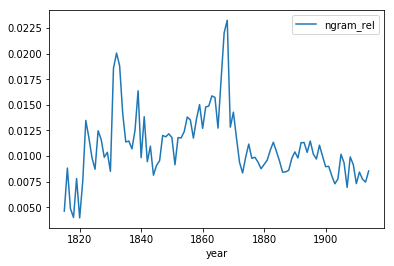

In [5]:
token_totals.plot.line(x='year', y='ngram_rel')

In [6]:
subset

year,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,...,1905,1906,1907,1908,1909,1910,1911,1912,1913,1914
ngram,,,,,,,,,,,,,,,,,,,,,
0 buitenlandsche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00 buitenlandsche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
000 buitenlandsche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0000 buitenlandsche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00— buitenlandsche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,15.0,12.0,18.0,18.0,18.0,14.0
025 buitenlandsche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
060 buitenlandsche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
090 buitenlandsche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0— buitenlandsche,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
